In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
image=matplotlib.image.imread('download_pic.jfif')

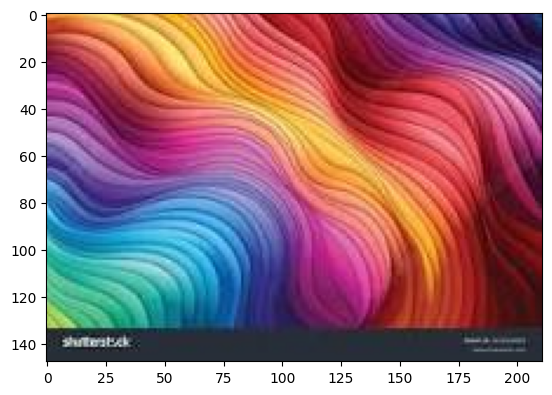

In [3]:
plt.imshow(image)

In [4]:
image.shape

(148, 211, 3)

In [5]:
X=image.reshape(-1,3)
X.shape

(31228, 3)

In [6]:
X

array([[235, 144,  65],
       [246, 155,  76],
       [255, 168,  87],
       ...,
       [ 39,  46,  56],
       [ 39,  46,  56],
       [ 39,  46,  56]], shape=(31228, 3), dtype=uint8)

In [7]:
from mpl_toolkits.mplot3d import Axes3D

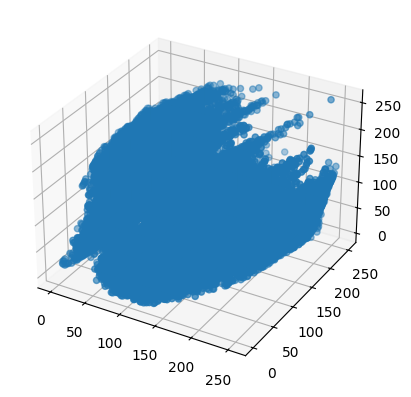

In [8]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2])

In [9]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [15]:
top_color=kmeans.cluster_centers_

In [16]:
from PIL import Image,ImageDraw

In [17]:
def create_color_palette(dominant_colors,palette_size=(300,50)):
    palette=Image.new('RGB',palette_size)
    draw=ImageDraw.Draw(palette)

    swatch_width=palette_size[0] // len(dominant_colors)

    for i ,color in enumerate(dominant_colors):
        draw.rectangle([i*swatch_width,0,(i+1) * swatch_width,palette_size[1]],fill=tuple(color))
    return palette    

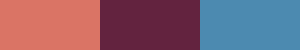

In [18]:
create_color_palette(kmeans.cluster_centers_.astype(int))

In [14]:
import pickle

In [20]:
with open("top_color.pkl", "wb") as f:
    pickle.dump(top_color, f)